In [1]:
from gensim.models import Word2Vec

model = Word2Vec.load('w2v_polish_lemmas.model')

In [2]:
words = ['mężczyzna', 'kobieta', 'żywiec', 'drogi', 'okocim', 'bułeczka', 'pierog_pieróg', 'piernik', 'droga', 'droga_drogi', 'polska_polski', 'pies', 'trznadel', 'kapibara']
#, 'pisk', 'nosorożec', 'lotniskowiec', 'długopis', 'pomidor', 'czekolada', 'paryż', 'warszawa']

for w in words:
    print (w)
    for w0,v in model.wv.most_similar(positive=[w], topn=10):
        print ('   ', v, w0)
    print ()

mężczyzna
    0.8625109195709229 kobieta
    0.6777706146240234 dziewczę
    0.6745297908782959 mężczyzna_mężczyzny
    0.6538349986076355 chłopiec
    0.6376321315765381 facet
    0.617714524269104 dziewczyna
    0.5854302048683167 dziewczynka
    0.5847803950309753 chłopak
    0.5710603594779968 maruda_mazepa_mężczyzna
    0.5635897517204285 nastolatek

kobieta
    0.8625110983848572 mężczyzna
    0.690904438495636 mężczyzna_mężczyzny
    0.680572509765625 dziewczę
    0.645418643951416 człowiek
    0.6298053860664368 dziewczyna
    0.6222387552261353 chłopiec
    0.6145922541618347 facet
    0.6047710180282593 osoba
    0.6024740934371948 dziecko
    0.6001608967781067 dziewczynka

żywiec
    0.563644289970398 dziewięciolistny
    0.5625561475753784 wieprzowy
    0.5615959763526917 jasło
    0.5603384375572205 półtusza
    0.5514643788337708 mitech
    0.5494357347488403 okocim
    0.5470839142799377 andrychów
    0.5417658686637878 strzyżów
    0.5349903702735901 ćwierćtusz
    0.5

In [3]:
def is_adjective(w):
    return w[-1] in 'iy'

adjs = ['kobieta', 'mężczyzna', 'szybki', 'wolny', 'ostry', 'ładny', 'brzydki', 'zielony', 'żółty', 'niebieski', 'słodki', 'gorzki']

for w in adjs:
    print (w)
    for w0,v in model.wv.most_similar(positive=[w], topn=50):
        if is_adjective(w0):
            print ('   ', v, w0)
    print ()

kobieta
    0.690904438495636 mężczyzna_mężczyzny
    0.5852496027946472 ciężarny
    0.5384118556976318 niezamężny
    0.5314740538597107 nastolatka_nastolatki
    0.503609299659729 nieżonaty
    0.4926357567310333 półnagi
    0.4907693564891815 kobiecy
    0.4850696921348572 dorosły
    0.4814893305301666 heteroseksualny
    0.47886621952056885 staruszka_staruszki

mężczyzna
    0.6745297908782959 mężczyzna_mężczyzny
    0.5346990823745728 niezamężny
    0.530120849609375 ciemnowłosy
    0.512715756893158 nieżonaty
    0.5123357176780701 ciężarny
    0.5059214234352112 półnagi
    0.48815223574638367 nieznajomy
    0.48229241371154785 heteroseksualny
    0.4819308817386627 czarnowłosy
    0.4781644642353058 najprzystojniejszy
    0.4761420488357544 jasnowłosy
    0.46998023986816406 staruszka_staruszki
    0.46819859743118286 dorosły

szybki
    0.8109790086746216 szybka_szybki
    0.7025272250175476 błyskawiczny
    0.6389523148536682 powolny
    0.6134557723999023 szybszy
    0.602

In [4]:
import random

def line(a, k):
    res = []
    for i in range(k):
        res.append(a)
        a += random.choice([1,1,1,2,2,3])
    return [str(n) for n in res]

N = 5000
corpus = [line(random.randint(0,400), random.randint(10,40)) for _ in range(N)]

In [5]:
print (line(10, 5))

for line in corpus[:4]:
    print ('#',*line)

['10', '11', '14', '15', '17']
# 43 44 47 50 53 54 55 56 59 60 61 63 64 66 69 70 73 74 75 78 80 81 83
# 300 301 302 303 304 306 307 308 310 311 312 314 317 320 323 324 326 327 328 329 331 333 335 336 337 339 340 342 345 348 349 350 351 352 354 355
# 29 30 31 33 36 37 38 39 42 43 45 46 48 49 50
# 269 271 272 274 276 278 280 282 285 286 287


In [1]:
model_numbers = Word2Vec(sentences=corpus, vector_size=20, window=2, min_count=10, workers=4)

NameError: name 'Word2Vec' is not defined

In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

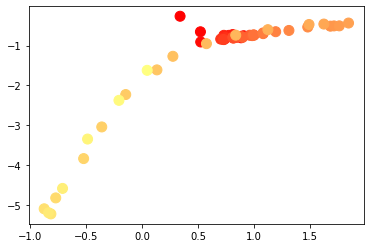

In [30]:
keys = model_numbers.wv.index_to_key
keys = sorted(keys, key=int)[:50]
m = int(max(keys, key=int))

xs = [model_numbers.wv[k][0] for k in keys]
ys = [model_numbers.wv[k][1] for k in keys]
cs = [(1.0, int(k)/m, 0.5*int(k)/m) for k in keys]

plt.scatter(xs,ys, c=cs, alpha=1, s=100)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'